In [228]:
#Python version 3.7.3
#Incase of version mismatch, kindly uncomment the code below and run the cell

# !pip install -r requirements.txt

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
plt.style.use('ggplot')
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import log_loss
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Id,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


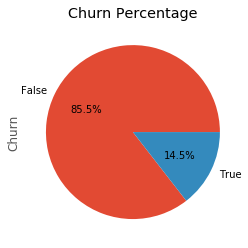

In [4]:
#Data Distribution
churn_count = df['Churn'].value_counts()
churn_count.plot(kind='pie', title='Churn Percentage', autopct='%1.1f%%');

In [5]:
df.shape

(3333, 21)

In [6]:
#Checking if any data point is missing
df.isna().sum()

Id                        0
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Exploratory data analysis 

In [7]:
#Kernel density estimation plot for continuous variables
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == False][feature], color= 'orange', label= 'Churn: No', shade= True)
    ax1 = sns.kdeplot(df[df['Churn'] == True][feature], color= 'blue', label= 'Churn: Yes', shade= True)

In [172]:
#barplot for categorical variables
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):

    
    g = df.groupby(feature)["Churn"].value_counts().to_frame()  
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = (g[axis_name]/len(df))*100   
    

    ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    ax.plot()
    
    intplan = pd.crosstab(df[feature],df['Churn'])
    intplan.div(intplan.sum(1), axis=0).plot(kind='bar', stacked=True)
    
    plt.show()

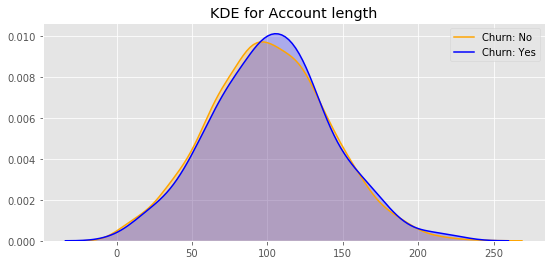

In [9]:
kdeplot('Account length')

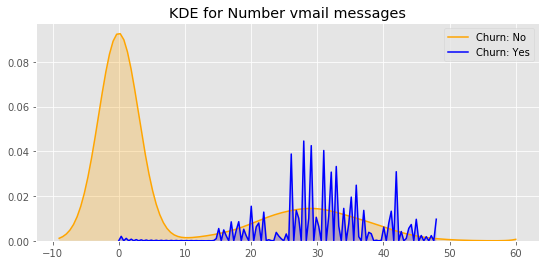

In [10]:
kdeplot('Number vmail messages')

Based on the above plot, it looks like someone who is sending high number of voice mail messages is more likely to churn than someone who is sending low number of voice messages.

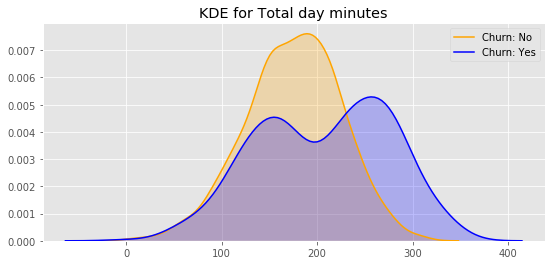

In [11]:
kdeplot('Total day minutes')

someone whose total call duration during the day is high (>200 minutes) is more likely to churn than someone who does low duration calls, this could potentially be due to high bill amount.

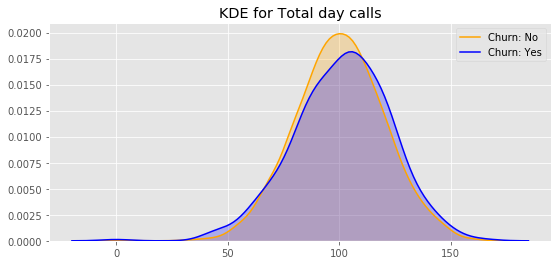

In [12]:
kdeplot('Total day calls')

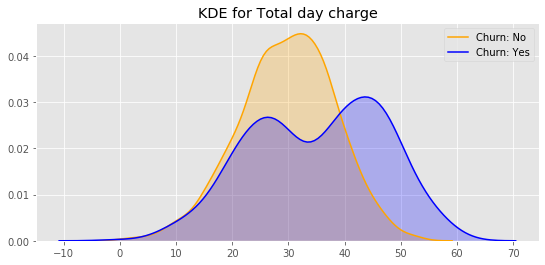

In [13]:
kdeplot('Total day charge')

Similar chart pattern as "kdeplot('Total day minutes')", and it can be observed that long call duation is leading to high bill and hence the customer is more likely to churn.

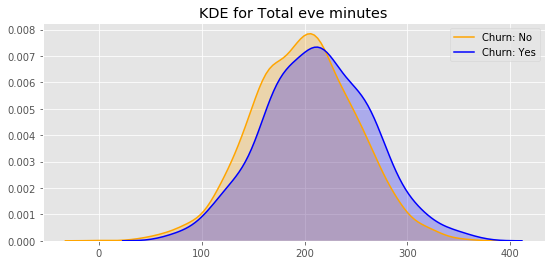

In [14]:
kdeplot('Total eve minutes')

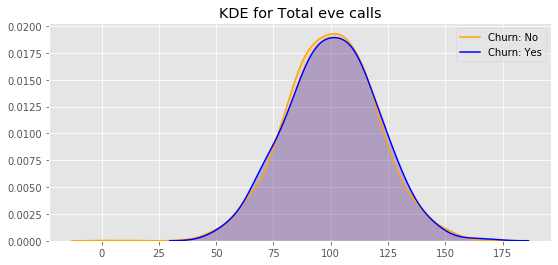

In [15]:
kdeplot('Total eve calls')

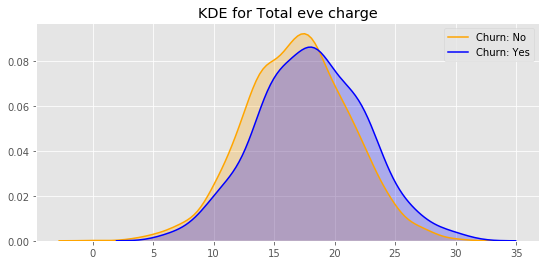

In [16]:
kdeplot('Total eve charge')

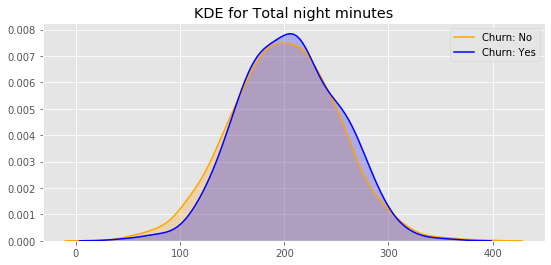

In [17]:
kdeplot('Total night minutes')

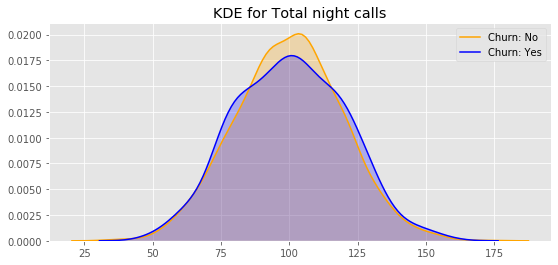

In [18]:
kdeplot('Total night calls')

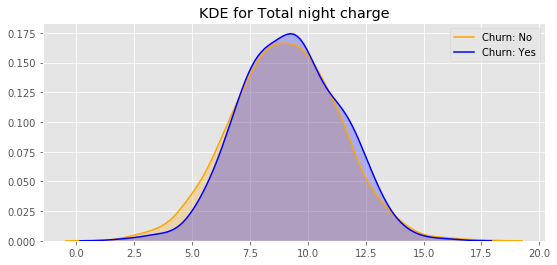

In [19]:
kdeplot('Total night charge')

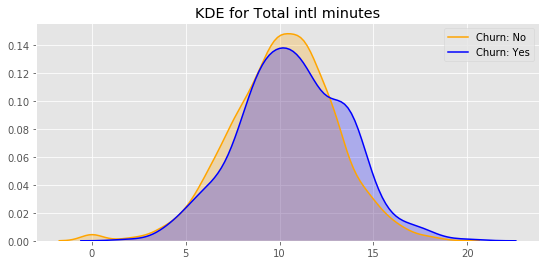

In [20]:
kdeplot('Total intl minutes')

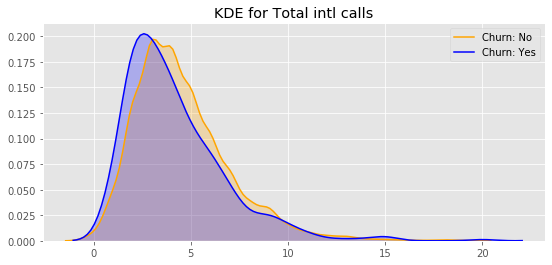

In [21]:
kdeplot('Total intl calls')

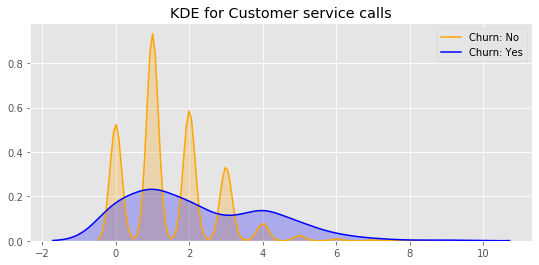

In [22]:
kdeplot('Customer service calls')

In [23]:
df["Customer service calls"].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [24]:
df.groupby("Churn")["Customer service calls"].mean()

Churn
False    1.449825
True     2.229814
Name: Customer service calls, dtype: float64

It can be observed that the average numbers of calls to customer care service is higher in case of customers who have churned as compared to the one who have not

In [25]:
#Taking a look at the total minutes, calls and charges

In [26]:
df["TotalMinutes"] = df.apply(lambda x: x["Total day minutes"] + x["Total eve minutes"] + x["Total night minutes"] + x["Total intl minutes"], axis =1)
df["TotalCalls"] = df.apply(lambda x: x["Total day calls"] + x["Total eve calls"] + x["Total night calls"]+ x["Total intl calls"], axis =1)
df["TotalCharges"] = df.apply(lambda x: x["Total day charge"] + x["Total eve charge"] + x["Total night charge"]+ x["Total intl charge"], axis =1)

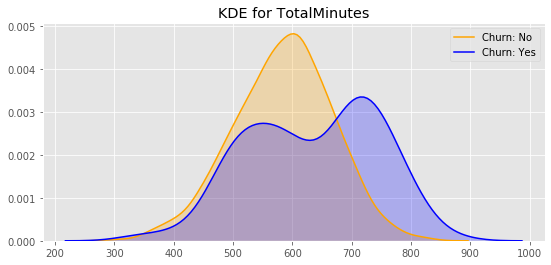

In [27]:
kdeplot('TotalMinutes')

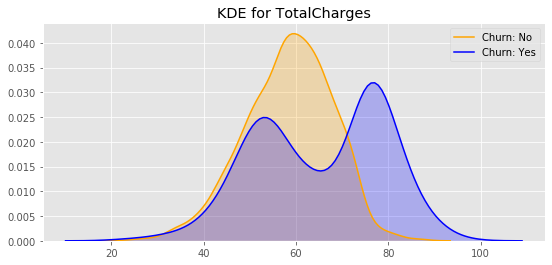

In [28]:
kdeplot('TotalCharges')

A similar pattern (like, kdeplot('Total day minutes') and kdeplot('Total day charge')) can be observed here as well, due to long duration day calls, the total call duration is increasing and hence the total bill is increases, which is one of the factors contributing to customer churn

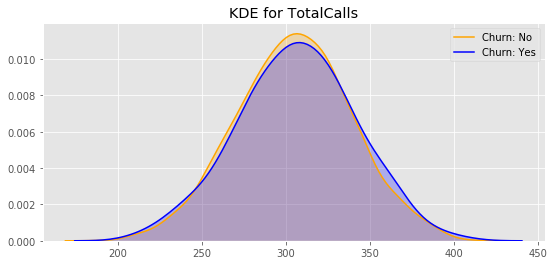

In [29]:
kdeplot('TotalCalls')

EDA for categorical data

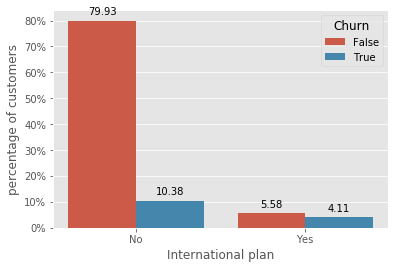

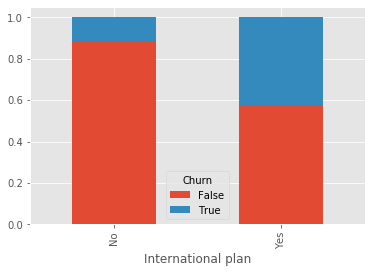

In [127]:
barplot_percentages("International plan")

Subscribers with an international plan is more likely to churn than the ones without one.

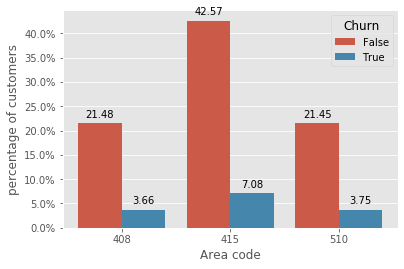

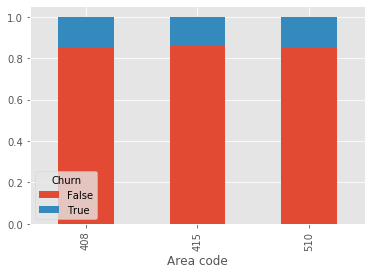

In [128]:
barplot_percentages("Area code")

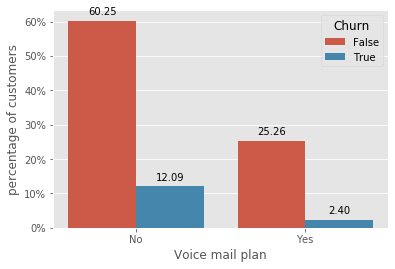

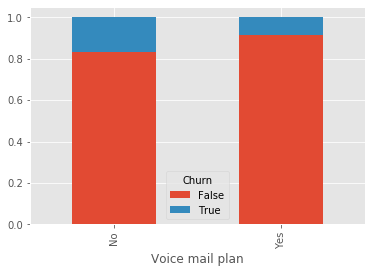

In [129]:
barplot_percentages("Voice mail plan")

In [33]:
#checking correlation between features 

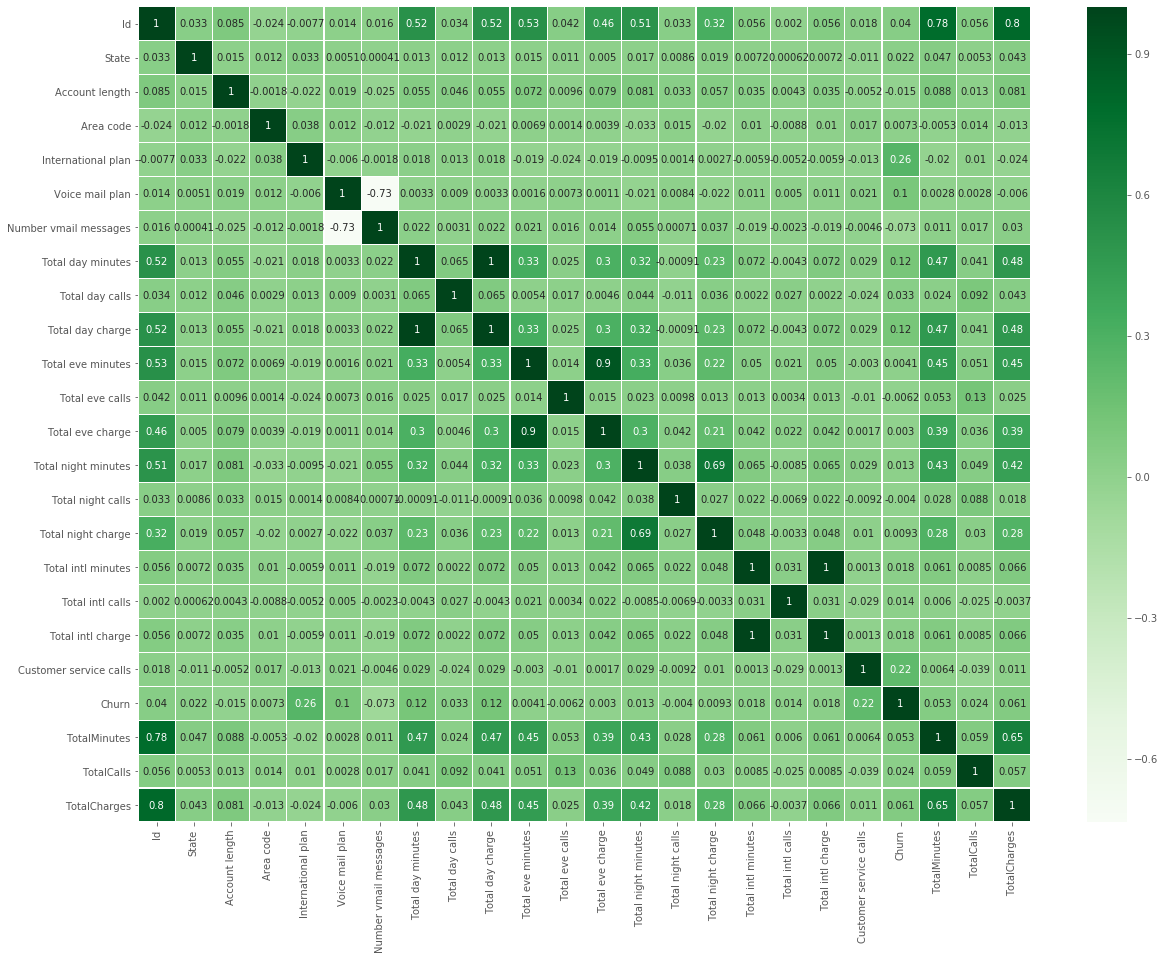

In [231]:
plt.figure(figsize=(20, 15))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="Greens", annot =  True)

We can clearly observe a very high correlation (>0.6) between the following columns:

1. Total day charges and Total day minutes 
2. Total eve charges and Total eve minutes 
3. Total night charges and Total night minutes 
4. Total intl charges and Total intl minutes 

In [35]:
#additionally -->
#dropping Id because it is just a column to identify unique rows in the dataset
#and dropping columns which i derived for EDA purpose -->TotalMinutes, Totalcalls, TotalCharges

data = df.drop(["Id", "State", "Total day minutes","Total eve minutes", "Total night minutes", "Total intl minutes",
               'TotalCharges', 'TotalMinutes', 'TotalCalls'], axis = 1) 

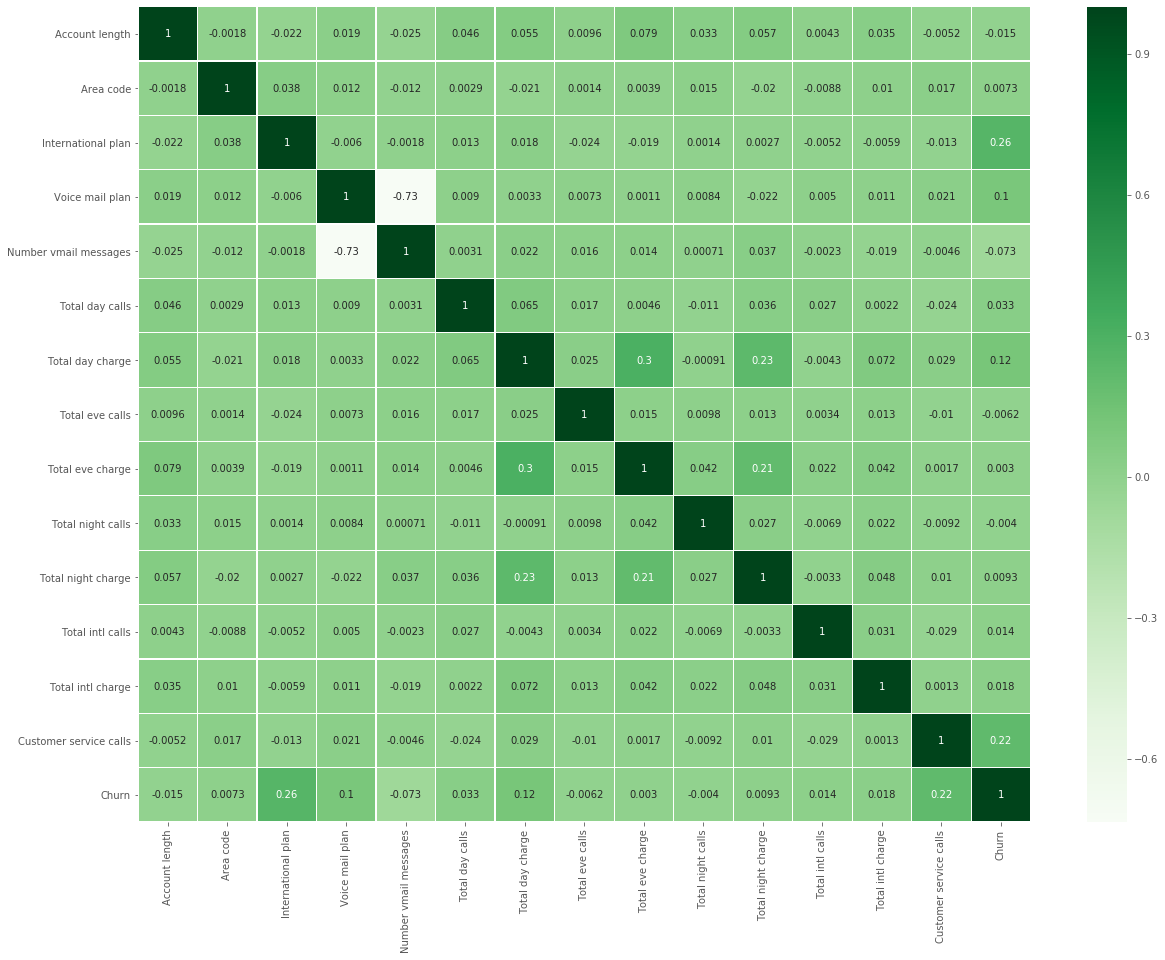

In [36]:
#plotting the correlation plot for the final feature set
plt.figure(figsize=(20, 15))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="Greens", annot =  True)

In [37]:
data.dtypes

Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day calls             int64
Total day charge          float64
Total eve calls             int64
Total eve charge          float64
Total night calls           int64
Total night charge        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [38]:
#correcting the datatype of existing column
data["Area code"] = data["Area code"].astype("object")

In [39]:
categorical_cols = [c for c in data.columns if data[c].dtype == 'object']

for col in categorical_cols:
    if data[col].nunique() == 2:
        data[col], _ = pd.factorize(data[col])
    else:
        data = pd.get_dummies(data, columns=[col], drop_first = True)

In [40]:
X, y = data.drop(["Churn"], axis=1), df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [41]:
continuous_cols = ['Account length', 'Number vmail messages', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls']

for col in continuous_cols:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

Dimension reduction for better visualization

In [42]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3' ])
principalDf["label"] = y.values

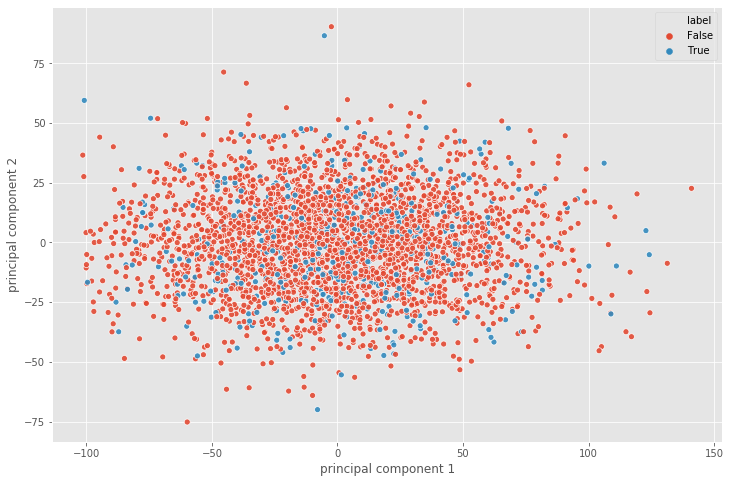

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="principal component 1", y="principal component 2", hue="label", data=principalDf, legend="full", alpha=0.9)

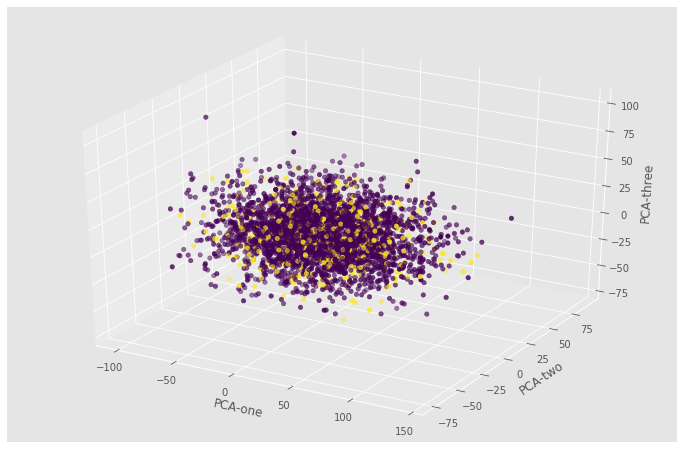

In [44]:
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=principalDf["principal component 1"], 
    ys=principalDf["principal component 2"], 
    zs=principalDf["principal component 3"], 
    c= principalDf["label"]
)
ax.set_xlabel('PCA-one')
ax.set_ylabel('PCA-two')
ax.set_zlabel('PCA-three')
plt.show()

t-SNE Plot

In [45]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3333 samples in 0.018s...
[t-SNE] Computed neighbors for 3333 samples in 0.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3333
[t-SNE] Computed conditional probabilities for sample 2000 / 3333
[t-SNE] Computed conditional probabilities for sample 3000 / 3333
[t-SNE] Computed conditional probabilities for sample 3333 / 3333
[t-SNE] Mean sigma: 8.349268
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.770279
[t-SNE] KL divergence after 300 iterations: 1.835773


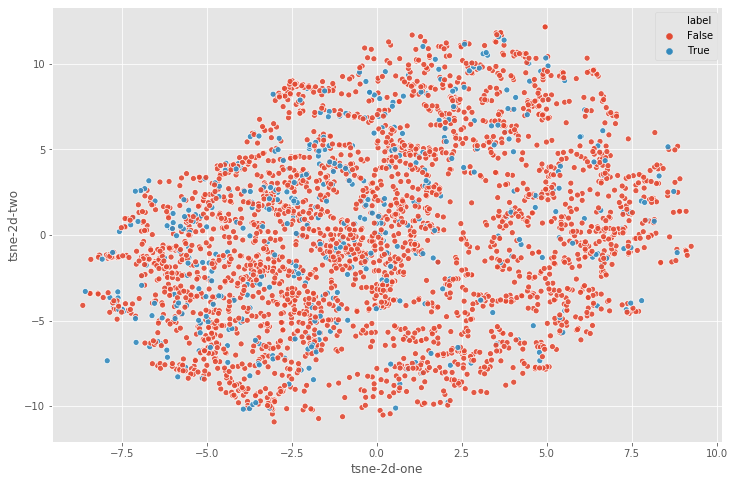

In [46]:
principalDf['tsne-2d-one'] = tsne_results[:,0]
principalDf['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(12,8))
sns.scatterplot( x="tsne-2d-one", y="tsne-2d-two",hue="label", data=principalDf, legend="full", alpha=0.9)

Clearly the data is not linearly saperable in reduced dimension space

Logistic Regression --> although the data doesn't look linearly saperable, this could be used as a Baseline

In [47]:
logistic = linear_model.LogisticRegression(max_iter = 1000)

# Creating regularization penalty space and hyperparameter space
penalty = ['l1', 'l2']
solver = [ "newton-cg", "liblinear", "lbfgs" ]
C = np.logspace(0, 10, 50)

# Creating hyperparameter options
hyperparameters_log = dict(C=C, penalty=penalty,solver = solver)

In [48]:
# Creating and fitting grid search using 10-fold cross validation
grid_logistic = GridSearchCV(logistic, hyperparameters_log, cv=10, verbose=0)
grid_logistic.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs']})

In [49]:
grid_logistic.best_params_

{'C': 12.91549665014884, 'penalty': 'l1', 'solver': 'liblinear'}

In [116]:
gridlogpredict = grid_logistic.predict(X_test)
print(classification_report(y_test,gridlogpredict))
print(confusion_matrix(y_test, gridlogpredict))

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       863
        True       0.47      0.20      0.29       137

    accuracy                           0.86      1000
   macro avg       0.68      0.58      0.60      1000
weighted avg       0.83      0.86      0.84      1000

[[832  31]
 [109  28]]


In [88]:
#Modeling the logistic classifier with the best parameters 

bestlogistic = LogisticRegression(C=12.91549665014884, penalty='l1',solver = 'liblinear' )  
bestlogistic.fit(X_train, y_train)
bestlogisticpredict = bestlogistic.predict(X_test)

print(classification_report(y_test,bestlogisticpredict))
print(confusion_matrix(y_test, bestlogisticpredict))

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       863
        True       0.47      0.20      0.29       137

    accuracy                           0.86      1000
   macro avg       0.68      0.58      0.60      1000
weighted avg       0.83      0.86      0.84      1000

[[832  31]
 [109  28]]


In [89]:
probability_class_1 = bestlogistic.predict_proba(X_test)[:, 1] 

In [90]:
def auc_roc_curve(model_name, ground_truth, probability_value):

    baseline = [0 for _ in range(len(ground_truth))]


    baseline_auc = roc_auc_score(ground_truth, baseline)
    model_roc_auc = roc_auc_score(ground_truth, probability_value)  

    print(f'Base line: ROC AUC = {baseline_auc}')
    print(f'{model_name}: ROC AUC = {model_roc_auc}')

    # calculating roc curves
    ns_fpr, ns_tpr, _ = roc_curve(ground_truth, baseline)
    lr_fpr, lr_tpr, _ = roc_curve(ground_truth, probability_value)

    # plotting the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)


    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

Base line: ROC AUC = 0.5
Logistic Regression: ROC AUC = 0.812544933223943


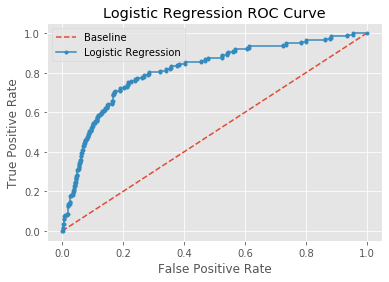

In [91]:
auc_roc_curve("Logistic Regression", y_test, probability_class_1)

In [92]:
print("Log-loss on Logistic Regression: {:6.4f}".format(log_loss(y_test, probability_class_1)))

Log-loss on Logistic Regression: 0.3224


In [93]:
#Finding the best threshold

lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, probability_class_1) 

f1_score= []

for precision, recall, threshold in zip(lr_precision, lr_recall, thresholds):
        if precision + recall:
            f1_score.append(2*(precision*recall)/ ( precision+recall))
        else:
            f1_score.append(0)
            
index_max_f1 = np.argmax(f1_score)
print(f'Best Threshold= {thresholds[index_max_f1]}, F1-Score = {f1_score[index_max_f1]}')

Best Threshold= 0.20229696975532926, F1-Score = 0.5065274151436031


In [94]:
def plot_feature_importance(importance, names, model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' feature importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [95]:
def permutation_importances(model, X_train, y_train, metric):
    y_pred = model.predict_proba(X_train)[:, 1]
    baseline = metric(y_train, y_pred)
    
    imp = []
    for col in X.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        
        pred = model.predict_proba(X_train)[:, 1]
        m = metric(y_train, pred)
        X_train[col] = save
        imp.append(baseline - m)
        
    return np.array(imp)

In [96]:
lr_feature_importance = permutation_importances(bestlogistic, X_train, y_train, roc_auc_score )

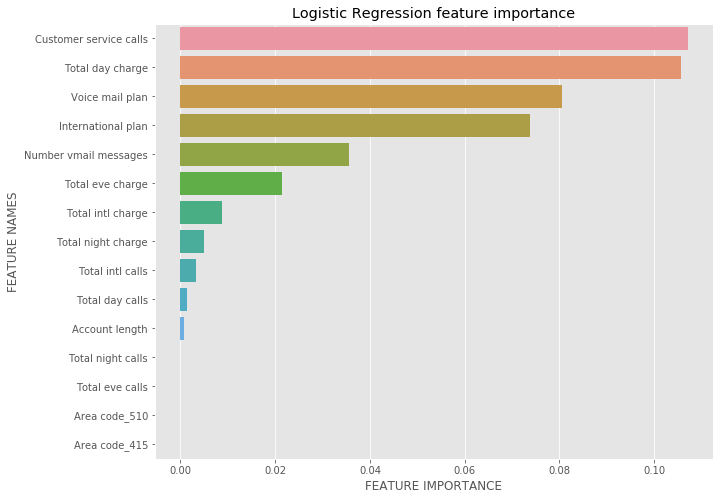

In [97]:
plot_feature_importance(lr_feature_importance, X.columns, "Logistic Regression")

Support Vector Machines

In [61]:
#Creating SVC model using GridSearchCV

param_grid = {'C':np.linspace(0,10,10),
              'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              'kernel':['linear','rbf', "poly", "sigmoid"]}

grid = GridSearchCV(SVC(),param_grid, refit = True, verbose=2, cv= 10)

grid.fit(X_train,y_train)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.0, gamma=0

[CV] END .......................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ......................C=0.0, gamma=1.0, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.0, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...C=1.111111111111

[CV] END ........C=1.1111111111111112, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=1.1111111111111112, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=1.1111111111111112, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=1.1111111111111112, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=1.1111111111111112, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=1.1111111111111112, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......C=1.1111111111111112, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......C=1.1111111111111112, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......C=1.1111111111111112, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......C=1.1111111111111112, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......C=1.1111111111111112, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......C=1.1111111111111112, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......C=1.11111111

[CV] END ...C=1.1111111111111112, gamma=10.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=10.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=10.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=10.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=100.0, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=100.0, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=100.0, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=100.0, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=100.0, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=100.0, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=100.0, kernel=linear; total time=   0.0s
[CV] END ...C=1.1111111111111112, gamma=100.0, kernel=linear; total time=   0.0s
[CV] END ...C=1.111111111111

[CV] END ......C=2.2222222222222223, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..C=2.2222222222222223, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..C=2.2222222222222

[CV] END .....C=2.2222222222222223, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=1.0, kernel=linear; total time=   0.1s
[CV] END .....C=2.2222222222222223, gamma=1.0, kernel=linear; total time=   0.1s
[CV] END .....C=2.2222222222222223, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END .....C=2.2222222222222223, gamma=1.0, kernel=linear; total time=   0.1s
[CV] END .....C=2.2222222222222223, gamma=1.0, kernel=linear; total time=   0.1s
[CV] END ........C=2.2222222222222223, gamma=1.0, kernel=rbf; total time=   0.4s
[CV] END ........C=2.2222222222222223, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END ........C=2.2222222222222223, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END ........C=2.2222222222222223, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END ........C=2.2222222

[CV] END .....C=2.2222222222222223, gamma=100.0, kernel=poly; total time=   0.4s
[CV] END .....C=2.2222222222222223, gamma=100.0, kernel=poly; total time=   0.4s
[CV] END .....C=2.2222222222222223, gamma=100.0, kernel=poly; total time=   0.3s
[CV] END .....C=2.2222222222222223, gamma=100.0, kernel=poly; total time=   0.2s
[CV] END .....C=2.2222222222222223, gamma=100.0, kernel=poly; total time=   0.3s
[CV] END .....C=2.2222222222222223, gamma=100.0, kernel=poly; total time=   0.3s
[CV] END ..C=2.2222222222222223, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ..C=2.2222222222222223, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ..C=2.2222222222222223, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ..C=2.2222222222222223, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ..C=2.2222222222222223, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ..C=2.2222222222222223, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ..C=2.2222222222222

[CV] END ....C=3.3333333333333335, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ....C=3.3333333333333335, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ....C=3.3333333333333335, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ....C=3.3333333333333335, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .......C=3.3333333333333335, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......C=3.3333333333333335, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......C=3.3333333333333335, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......C=3.3333333333333335, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......C=3.3333333333333335, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......C=3.3333333333333335, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......C=3.3333333333333335, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......C=3.3333333333333335, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......C=3.33333333

[CV] END .......C=3.3333333333333335, gamma=1.0, kernel=poly; total time=   0.3s
[CV] END .......C=3.3333333333333335, gamma=1.0, kernel=poly; total time=   0.3s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.3333333333333335, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=3.33333333333

[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.5s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.5s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.5s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.4s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.5s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.4s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.6s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.4s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.4s
[CV] END .....C=3.3333333333333335, gamma=1000.0, kernel=rbf; total time=   0.5s
[CV] END ....C=3.3333333333333335, gamma=1000.0, kernel=poly; total time=   0.3s
[CV] END ....C=3.3333333333333335, gamma=1000.0, kernel=poly; total time=   0.4s
[CV] END ....C=3.33333333333

[CV] END ....C=4.444444444444445, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....C=4.444444444444445, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....C=4.444444444444445, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....C=4.444444444444445, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....C=4.444444444444445, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....C=4.444444444444445, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....C=4.444444444444445, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......C=4.444444444444445, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......C=4.444444444444445, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......C=4.444444444444445, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......C=4.444444444444445, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......C=4.444444444444445, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......C=4.444444444

[CV] END ........C=4.444444444444445, gamma=10.0, kernel=rbf; total time=   0.4s
[CV] END ........C=4.444444444444445, gamma=10.0, kernel=rbf; total time=   0.4s
[CV] END ........C=4.444444444444445, gamma=10.0, kernel=rbf; total time=   0.4s
[CV] END ........C=4.444444444444445, gamma=10.0, kernel=rbf; total time=   0.4s
[CV] END ........C=4.444444444444445, gamma=10.0, kernel=rbf; total time=   0.4s
[CV] END .......C=4.444444444444445, gamma=10.0, kernel=poly; total time=   0.2s
[CV] END .......C=4.444444444444445, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END .......C=4.444444444444445, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END .......C=4.444444444444445, gamma=10.0, kernel=poly; total time=   0.2s
[CV] END .......C=4.444444444444445, gamma=10.0, kernel=poly; total time=   0.4s
[CV] END .......C=4.444444444444445, gamma=10.0, kernel=poly; total time=   0.4s
[CV] END .......C=4.444444444444445, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END .......C=4.44444444

[CV] END ..C=4.444444444444445, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ..C=4.444444444444445, gamma=1000.0, kernel=sigmoid; total time=   0.0s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .......C=5.55555555

[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........C=5.555555555555555, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....C=5.555555555555555, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=5.555555555555555, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....C=5.5555555555

[CV] END ....C=5.555555555555555, gamma=100.0, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=100.0, kernel=linear; total time=   0.2s
[CV] END ....C=5.555555555555555, gamma=100.0, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=100.0, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=100.0, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=100.0, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=100.0, kernel=linear; total time=   0.1s
[CV] END ....C=5.555555555555555, gamma=100.0, kernel=linear; total time=   0.1s
[CV] END .......C=5.555555555555555, gamma=100.0, kernel=rbf; total time=   0.4s
[CV] END .......C=5.555555555555555, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END .......C=5.555555555555555, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END .......C=5.555555555555555, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END .......C=5.55555555

[CV] END ......C=6.666666666666667, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......C=6.666666666666667, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......C=6.666666666666667, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......C=6.666666666666667, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......C=6.666666666666667, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666

[CV] END ......C=6.666666666666667, gamma=1.0, kernel=linear; total time=   0.2s
[CV] END ......C=6.666666666666667, gamma=1.0, kernel=linear; total time=   0.3s
[CV] END ......C=6.666666666666667, gamma=1.0, kernel=linear; total time=   0.2s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.4s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........C=6.666666666666667, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........C=6.666666

[CV] END ......C=6.666666666666667, gamma=100.0, kernel=poly; total time=   0.3s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=100.0, kernel=sigmoid; total time=   0.0s
[CV] END ...C=6.666666666666667, gamma=1000.0, kernel=linear; total time=   0.2s
[CV] END ...C=6.666666666666

[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=7.777777777777779, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......C=7.777777777777779, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......C=7.777777777777779, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......C=7.777777777777779, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......C=7.77777777

[CV] END .....C=7.777777777777779, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END .....C=7.777777777777779, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END .....C=7.777777777777779, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END .....C=7.777777777777779, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END .....C=7.777777777777779, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END .....C=7.777777777777779, gamma=1.0, kernel=sigmoid; total time=   0.0s
[CV] END .....C=7.777777777777779, gamma=10.0, kernel=linear; total time=   0.2s
[CV] END .....C=7.777777777777779, gamma=10.0, kernel=linear; total time=   0.2s
[CV] END .....C=7.777777777777779, gamma=10.0, kernel=linear; total time=   0.5s
[CV] END .....C=7.777777777777779, gamma=10.0, kernel=linear; total time=   0.3s
[CV] END .....C=7.777777777777779, gamma=10.0, kernel=linear; total time=   0.2s
[CV] END .....C=7.777777777777779, gamma=10.0, kernel=linear; total time=   0.2s
[CV] END .....C=7.7777777777

[CV] END ......C=7.777777777777779, gamma=1000.0, kernel=rbf; total time=   0.4s
[CV] END ......C=7.777777777777779, gamma=1000.0, kernel=rbf; total time=   0.5s
[CV] END ......C=7.777777777777779, gamma=1000.0, kernel=rbf; total time=   0.5s
[CV] END ......C=7.777777777777779, gamma=1000.0, kernel=rbf; total time=   0.5s
[CV] END .....C=7.777777777777779, gamma=1000.0, kernel=poly; total time=   0.3s
[CV] END .....C=7.777777777777779, gamma=1000.0, kernel=poly; total time=   0.4s
[CV] END .....C=7.777777777777779, gamma=1000.0, kernel=poly; total time=   0.3s
[CV] END .....C=7.777777777777779, gamma=1000.0, kernel=poly; total time=   0.2s
[CV] END .....C=7.777777777777779, gamma=1000.0, kernel=poly; total time=   0.3s
[CV] END .....C=7.777777777777779, gamma=1000.0, kernel=poly; total time=   0.3s
[CV] END .....C=7.777777777777779, gamma=1000.0, kernel=poly; total time=   0.2s
[CV] END .....C=7.777777777777779, gamma=1000.0, kernel=poly; total time=   0.2s
[CV] END .....C=7.7777777777

[CV] END .....C=8.88888888888889, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....C=8.88888888888889, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END .......C=8.88888888888889, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END ..........C=8.88888

[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.2s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.2s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.2s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.2s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END ........C=8.88888888888889, gamma=10.0, kernel=poly; total time=   0.3s
[CV] END .....C=8.88888888888889, gamma=10.0, kernel=sigmoid; total time=   0.0s
[CV] END .....C=8.88888888888889, gamma=10.0, kernel=sigmoid; total time=   0.0s
[CV] END .....C=8.8888888888

[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time=   0.3s
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time=   0.4s
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time=   0.3s
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time=   0.3s
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ....................C=10.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=10.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=10.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=10.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10.0, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END .....................C=10.0, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END .....................C=10.0, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END .....................C=10.0, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END .....................C=10.0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10.0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10.0, gamma=100.0, kernel=linear; total time=   0.3s
[CV] END .................C=10.0, gamma=100.0, kernel=linear; total time=   0.3s
[CV] END .................C=10.0, gamma=100.0, kernel=linear; total time=   0.6s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.4s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time=   0.5s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [62]:
grid.best_params_

{'C': 4.444444444444445, 'gamma': 0.1, 'kernel': 'rbf'}

In [63]:
predicted_values = grid.predict(X_test)
print(classification_report(y_test, predicted_values))
print(confusion_matrix(y_test, predicted_values))

              precision    recall  f1-score   support

       False       0.93      0.98      0.95       863
        True       0.78      0.55      0.64       137

    accuracy                           0.92      1000
   macro avg       0.86      0.76      0.80      1000
weighted avg       0.91      0.92      0.91      1000

[[842  21]
 [ 62  75]]


In [82]:
#Model the classifier with the best parameters
modelbestSVC = svm.SVC(C=4.44, kernel='rbf', gamma=0.1, probability = True)  
modelbestSVC.fit(X_train, y_train)
predictionbestSVC = modelbestSVC.predict(X_test)

print(classification_report(y_test,predictionbestSVC))
print(confusion_matrix(y_test, predictionbestSVC))

              precision    recall  f1-score   support

       False       0.93      0.98      0.95       863
        True       0.78      0.55      0.64       137

    accuracy                           0.92      1000
   macro avg       0.86      0.76      0.80      1000
weighted avg       0.91      0.92      0.91      1000

[[842  21]
 [ 62  75]]


In [83]:
SVCprobability_class_1 = modelbestSVC.predict_proba(X_test)[:, 1]

Base line: ROC AUC = 0.5
Support Vector Classifier: ROC AUC = 0.8914117278886248


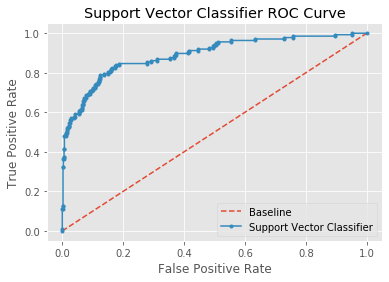

In [84]:
auc_roc_curve("Support Vector Classifier", y_test, SVCprobability_class_1)

In [85]:
print("Log-loss on SVC: {:6.4f}".format(log_loss(y_test, SVCprobability_class_1)))

Log-loss on SVC: 0.2359


In [86]:
svm_feature_importance_ = permutation_importances(modelbestSVC, X_train, y_train, roc_auc_score )

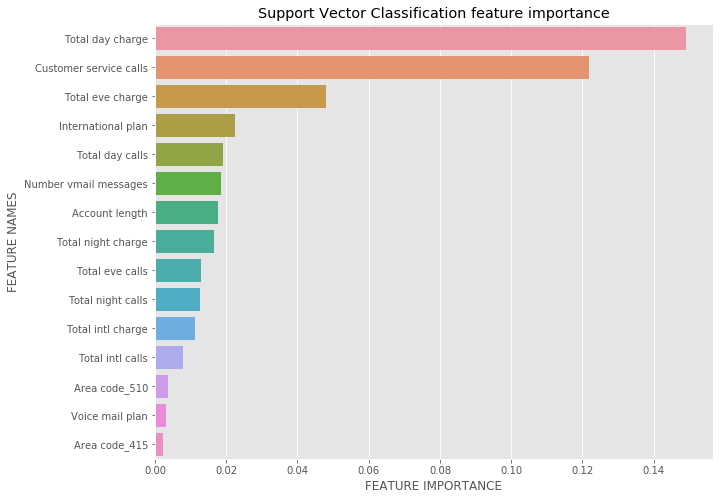

In [87]:
plot_feature_importance(svm_feature_importance_, X.columns, "Support Vector Classification")

KNN Classifier

In [180]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
hyperparameters_knn = dict(n_neighbors=k_range)

grid_knn = GridSearchCV(knn, hyperparameters_knn, cv=10)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [181]:
grid_knn.best_params_

{'n_neighbors': 5}

In [182]:
grid_knn_predict = grid_knn.predict(X_test)
print(classification_report(y_test,grid_knn_predict))
print(confusion_matrix(y_test, grid_knn_predict))

              precision    recall  f1-score   support

       False       0.88      0.99      0.93       863
        True       0.70      0.19      0.30       137

    accuracy                           0.88      1000
   macro avg       0.79      0.59      0.62      1000
weighted avg       0.86      0.88      0.85      1000

[[852  11]
 [111  26]]


In [184]:
#Modeling the classifier with the best parameters
modelbestknn = KNeighborsClassifier(n_neighbors = 5) 
modelbestknn.fit(X_train, y_train)
predictionbestknn = modelbestknn.predict(X_test)

print(classification_report(y_test,predictionbestknn))
print(confusion_matrix(y_test, predictionbestknn))

              precision    recall  f1-score   support

       False       0.88      0.99      0.93       863
        True       0.70      0.19      0.30       137

    accuracy                           0.88      1000
   macro avg       0.79      0.59      0.62      1000
weighted avg       0.86      0.88      0.85      1000

[[852  11]
 [111  26]]


In [185]:
knnprobability_class_1 = modelbestknn.predict_proba(X_test)[:, 1]

Base line: ROC AUC = 0.5
K Nearest Neighbor: ROC AUC = 0.7288655259618881


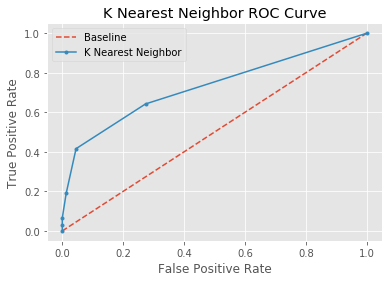

In [186]:
auc_roc_curve("K Nearest Neighbor", y_test, knnprobability_class_1)

In [187]:
print("Log-loss on knn: {:6.4f}".format(log_loss(y_test, knnprobability_class_1)))

Log-loss on knn: 1.8488


Random Forest

In [98]:
rfc=RandomForestClassifier()

hyperparameters_rfc = { 
    'n_estimators': [100,150],
    'max_features': [None, 'log2', 'sqrt'],
    'max_depth' : list(range(3,10,1)),
    'criterion' :['gini', 'entropy']
}

grid_rfc = GridSearchCV(estimator=rfc, param_grid=hyperparameters_rfc, cv= 10)
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': [None, 'log2', 'sqrt'],
                         'n_estimators': [100, 150]})

In [99]:
grid_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'n_estimators': 100}

In [100]:
grid_rfc_predict = grid_rfc.predict(X_test)
print(classification_report(y_test,grid_rfc_predict))
print(confusion_matrix(y_test, grid_rfc_predict))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       863
        True       0.96      0.80      0.87       137

    accuracy                           0.97      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.97      0.97      0.97      1000

[[858   5]
 [ 28 109]]


In [101]:
#Modeling the classifier with the best parameters
modelbestRFC = RandomForestClassifier(criterion = 'entropy', max_depth= 9, max_features =None, n_estimators = 100) 
modelbestRFC.fit(X_train, y_train)
predictionbestRFC = modelbestRFC.predict(X_test)

print(classification_report(y_test, predictionbestRFC))
print(confusion_matrix(y_test, predictionbestRFC))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       863
        True       0.95      0.77      0.85       137

    accuracy                           0.96      1000
   macro avg       0.96      0.88      0.92      1000
weighted avg       0.96      0.96      0.96      1000

[[857   6]
 [ 31 106]]


In [102]:
RFprobability_class_1 = modelbestRFC.predict_proba(X_test)[:, 1]

Base line: ROC AUC = 0.5
Random Forest: ROC AUC = 0.9157665925180368


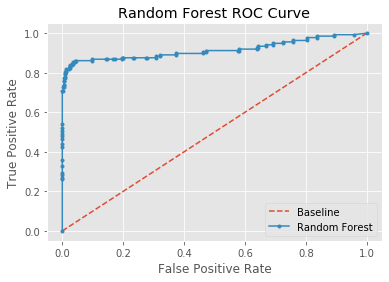

In [103]:
auc_roc_curve("Random Forest", y_test, RFprobability_class_1)

In [104]:
print("Log-loss on RF: {:6.4f}".format(log_loss(y_test, RFprobability_class_1)))

Log-loss on RF: 0.1820


In [105]:
feature_importance_ = permutation_importances(modelbestRFC, X_train, y_train, roc_auc_score)

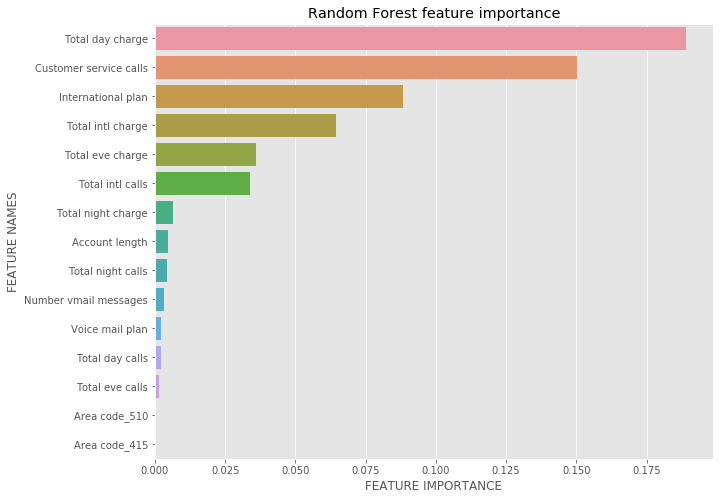

In [106]:
plot_feature_importance(feature_importance_, X.columns, 'Random Forest')

Boosting Trees

In [107]:
abc = AdaBoostClassifier()

hyperparameters_abc = { 
    "base_estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
    'n_estimators': [100,150,200],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}

grid_abc = GridSearchCV(estimator=abc, param_grid=hyperparameters_abc, cv= 10)
grid_abc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2),
                                            DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [100, 150, 200]})

In [108]:
grid_abc.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=3),
 'learning_rate': 0.1,
 'n_estimators': 200}

In [109]:
grid_abc_predict = grid_abc.predict(X_test)
print(classification_report(y_test,grid_abc_predict))
print(confusion_matrix(y_test, grid_abc_predict))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       863
        True       0.88      0.74      0.80       137

    accuracy                           0.95      1000
   macro avg       0.92      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000

[[849  14]
 [ 36 101]]


In [188]:
#Modeling the classifier with the best parameters
modelbestABC = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), learning_rate= 0.1, n_estimators = 200) 
modelbestABC.fit(X_train, y_train)
predictionbestABC = modelbestABC.predict(X_test)

print(classification_report(y_test, predictionbestABC))
print(confusion_matrix(y_test, predictionbestABC))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       863
        True       0.89      0.74      0.80       137

    accuracy                           0.95      1000
   macro avg       0.92      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000

[[850  13]
 [ 36 101]]


In [192]:
ABprobability_class_1 = modelbestABC.predict_proba(X_test)[:, 1]

Base line: ROC AUC = 0.5
AdaBoost: ROC AUC = 0.8984022802818211


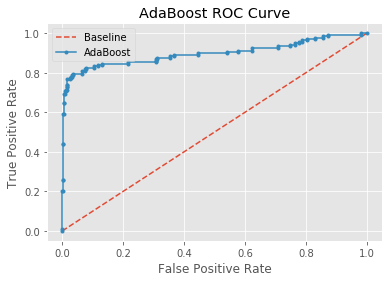

In [193]:
auc_roc_curve("AdaBoost", y_test, ABprobability_class_1)

In [194]:
print("Log-loss on RF: {:6.4f}".format(log_loss(y_test, ABprobability_class_1)))

Log-loss on RF: 0.5328


In [195]:
adaboost_feature_importance_ = permutation_importances(modelbestABC, X_train, y_train, roc_auc_score)

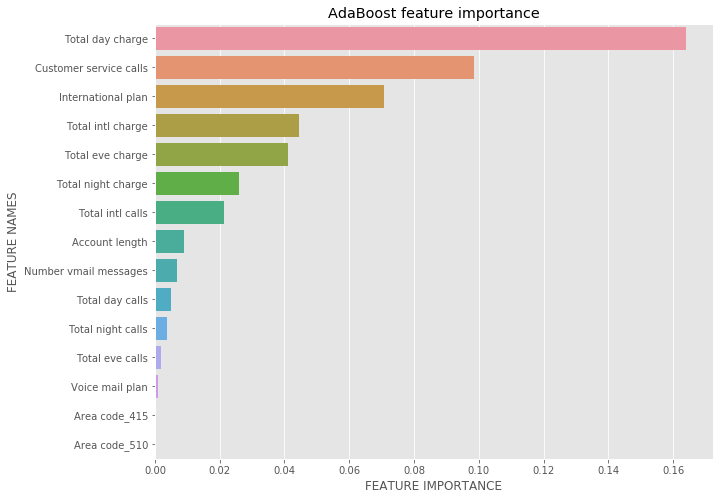

In [196]:
plot_feature_importance(adaboost_feature_importance_, X.columns, 'AdaBoost')

overall model comparision

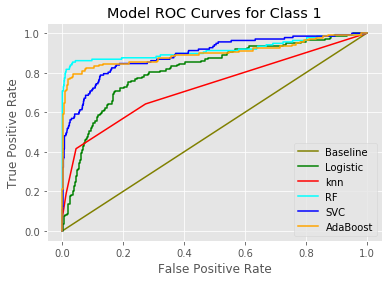

In [175]:
baseline = [0 for _ in range(len(y_test))]
lr_roc_auc = roc_auc_score(y_test, probability_class_1)
SVC_roc_auc = roc_auc_score(y_test, SVCprobability_class_1)
knn_roc_auc = roc_auc_score(y_test, knnprobability_class_1)
RF_roc_auc = roc_auc_score(y_test, RFprobability_class_1)
AB_roc_auc = roc_auc_score(y_test, ABprobability_class_1)

#roc curves
baseline_fpr, baseline_tpr, _  = roc_curve(y_test, baseline)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, probability_class_1)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knnprobability_class_1)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RFprobability_class_1)
SVC_fpr, SVC_tpr, _ = roc_curve(y_test, SVCprobability_class_1)
AB_fpr, AB_tpr, _ = roc_curve(y_test, ABprobability_class_1)

# plotting the roc curve for the model
plt.plot(baseline_fpr, baseline_tpr, color='olive', label='Baseline')
plt.plot(lr_fpr, lr_tpr, color='green', label='Logistic')
plt.plot(knn_fpr, knn_tpr, color='red', label='knn')
plt.plot(RF_fpr, RF_tpr, color='cyan', label='RF')
plt.plot(SVC_fpr, SVC_tpr, color='blue', label='SVC')
plt.plot(AB_fpr, AB_tpr, color='orange', label='AdaBoost')

plt.title('Model ROC Curves for Class 1');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [201]:
# #PLot bar chart comparing the four different models
Model_Type = ['Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbor', 'Random Forest', "AdaBoost"]
AUC_ROC = [0.81, 0.89, 0.728, 0.915, 0.897]
log_loss= [0.3224, 0.2359, 1.84, 0.18, 0.5533]
F1 = []
Precision= []
Recall= []

for model in [bestlogistic, modelbestSVC, modelbestknn, modelbestRFC, modelbestABC]:
    Precision.append(precision_score(y_test, model.predict(X_test)))
    Recall.append(recall_score(y_test, model.predict(X_test)))
    F1.append(f1_score(y_test, model.predict(X_test)))

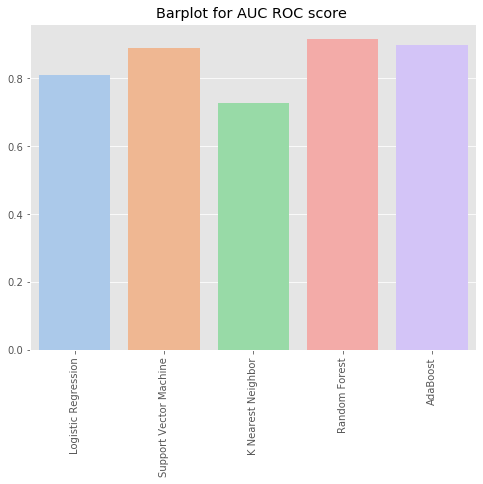

In [206]:
plt.figure(figsize=(8, 6))
plt.title("Barplot for AUC ROC score ")
ax = sns.barplot(x=Model_Type, y=AUC_ROC, palette= "pastel")
plt.xticks(rotation=90)
plt.show()

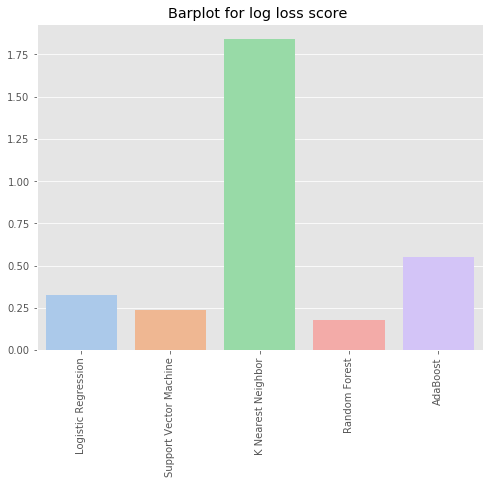

In [214]:
plt.figure(figsize=(8, 6))
plt.title("Barplot for log loss score ")
ax = sns.barplot(x=Model_Type, y=log_loss, palette= "pastel")
plt.xticks(rotation=90)
plt.show()

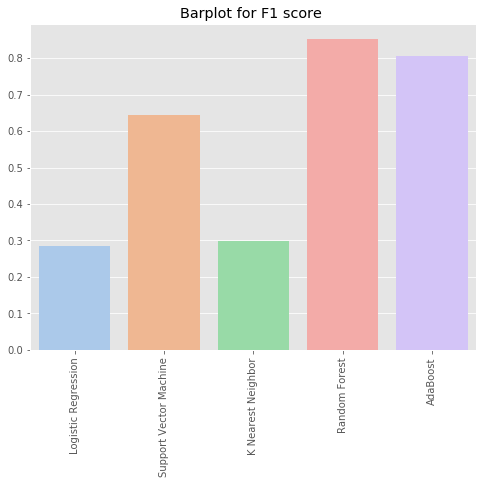

In [213]:
plt.figure(figsize=(8, 6))
plt.title("Barplot for F1 score ")
ax = sns.barplot(x=Model_Type, y=F1, palette= "pastel")
plt.xticks(rotation=90)
plt.show()

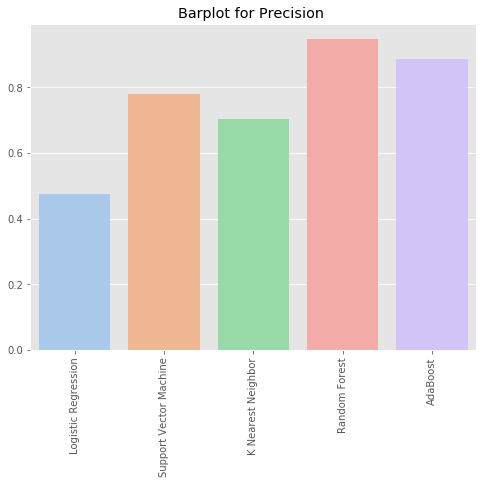

In [211]:
plt.figure(figsize=(8, 6))
plt.title("Barplot for Precision ")
ax = sns.barplot(x=Model_Type, y=Precision, palette= "pastel")
plt.xticks(rotation=90)
plt.show()

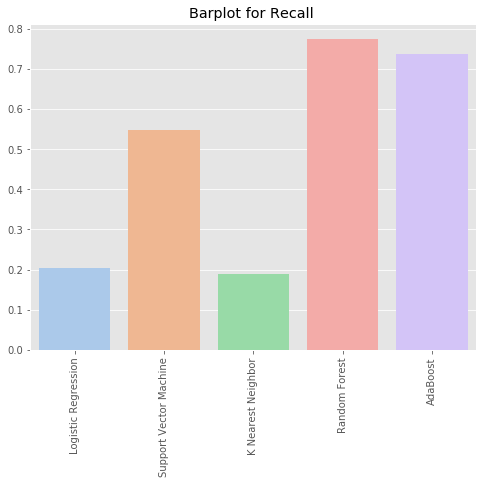

In [208]:
plt.figure(figsize=(8, 6))
plt.title("Barplot for Recall ")
ax = sns.barplot(x=Model_Type, y=Recall, palette= "pastel")
plt.xticks(rotation=90)
plt.show()